In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Proyecto integrado

## Nivel de éxito de videojuegos en distintas plataformas en el año 2016

### 1. Preparación de los datos 


Primero leemos y analizamos los tipos de datos que tenemos, los nombres de las columnas y valores que contienen.

In [2]:
games = pd.read_csv("games.csv") #leemos el archivo

In [3]:
games.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Nos encontramos con 3 columnas cuyos valores ausentes son significativos, ya que son una gran proporsión de los valores totales. Se requiere analizar a qué están ligados antes de saber cómo tratarlos, dado que son datos categóricos su tratamiento se realizará más adelante para continuar con el análisis de ventas.

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

Hacemos las modificaciones necesarias a los datos. Agregamos una columna con formato fecha para el año de lanzamiento sin eliminar la columan existente ya que podremos utilizar el tipo de datos flotantes más adelante. Modificaremos los nombres de las columnas a minúsculas para cumplir con la estructura. Crearemos una columna con el user score como flotante sin eliminar la anterior como respaldo, para lo que será necesario respetar los datos que están por procesar (tbd) ya que no conviene elimianrlos.

In [6]:
games["Year_Date"] = pd.to_datetime(games["Year_of_Release"], format="%Y") #creamos una columna con el formato fecha para el año de lanzamiento.

In [7]:
games.columns = games.columns.str.lower() #cambiamos los nombres a minúsculas

En el caso de datos tbd haremos un filtrado, los que cumplen la condición de ser tbd se asignaran como valores negativos para no eliminarlos ni tomarlos como nulos, sin embargo, a la hora de hacer cálculos hay que considerar que los valores pueden verse afectados pro esto. Se tomará en cuenta el rango real de los números para no afectarse por los nuevos negativos. Los valores reales o "completos" se asignarán a una nueva columna llamada user_score_new.

In [8]:
#Nueva columna de user score como flotante
games["user_score_new"] = np.where(
    #se asigna negativo a los datos que estén por procesarlo identificando que es por determinarse, 
    # sin embargo al momento de calcular un promedio se descartarían los valores negativos que pudieran afectar.
    games["user_score"] == "tbd",
    -1,
    games["user_score"]
)
games["user_score_new"] = games["user_score_new"].astype("float")


In [9]:
#Suma de las ventas totales
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

### 2. Análisis de datos

*¿Los datos son significativos en cada periodo? Graficaremos los lanzamientos agrupándolos por año para distinguir los periodos más relevantes

<Axes: xlabel='year_date'>

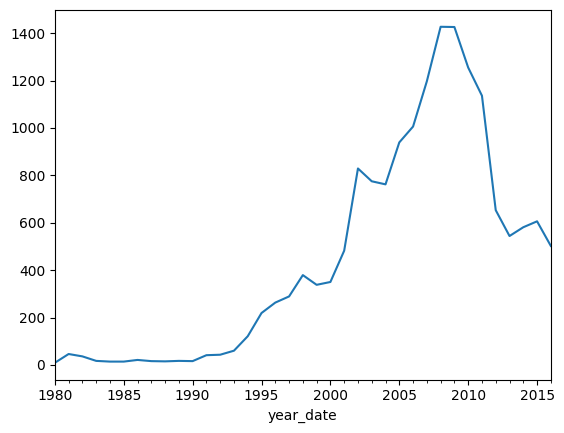

In [10]:
games.groupby("year_date")["name"].count().plot(kind="line") #agrupamos y graficamos

<Axes: xlabel='year_date'>

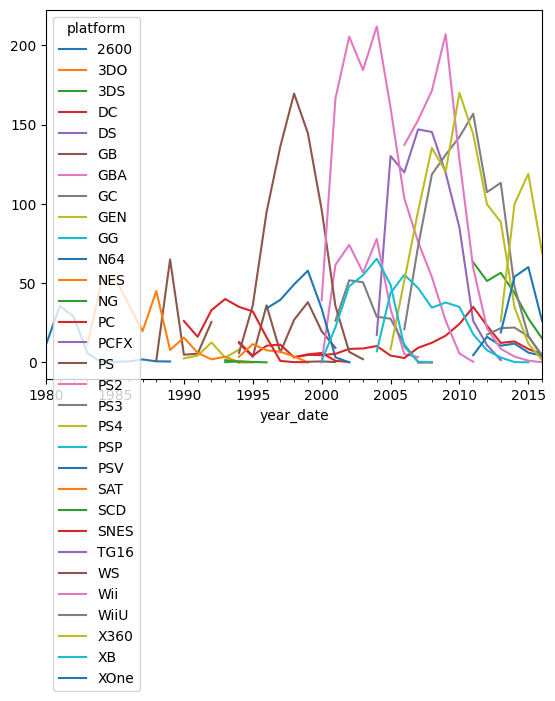

In [11]:
#Graficaremos por año y por ventas totales para cada plataforma
games.pivot_table(index="year_date", columns="platform", values="total_sales", aggfunc="sum").plot(kind="line")

Dado que antes del 1993 los lanzamientos no son muchos y no parecen afectar la tendencia posterios ni las decisiones que puedan tomarse para el 2017, podemos filtrarlos de nuestro análisis. Hay una tendencia positiva hasta 2008, y posteriormente hay un declive en lacantidad de lanzamientos.Se observa que la popularidad de las plataformas no es constante y en algunos casos las ventas llegan a desaparecer, por lo que anlizaremos cuales plataformas se han mantenido rentables a lo largo de los años.

In [12]:
#Conteo de años en los que se ha vendido en las plataformas
games.groupby("platform")["year_date"].nunique().sort_values(ascending=False)

platform
PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
Wii     11
DS      11
PS3     11
2600    10
SNES    10
PS      10
XB       9
GBA      8
DC       7
GC       7
N64      7
SAT      6
3DS      6
PSV      6
WiiU     5
GEN      5
NG       4
PS4      4
XOne     4
WS       3
SCD      2
3DO      2
TG16     1
GG       1
PCFX     1
Name: year_date, dtype: int64

Es considerable anotar que las plataformas que han tenido ventas por mas de 10 años deben ser tomadas en cuenta como rentables si entre estos años se incluye el 2016, ya que aunque no sean las de mayores ventas puede representar estabbilidad en el mercado.

*Plataformas más populares. ¿Cuales eran las plataformas más populares y ahora no? ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

<Axes: xlabel='year_date'>

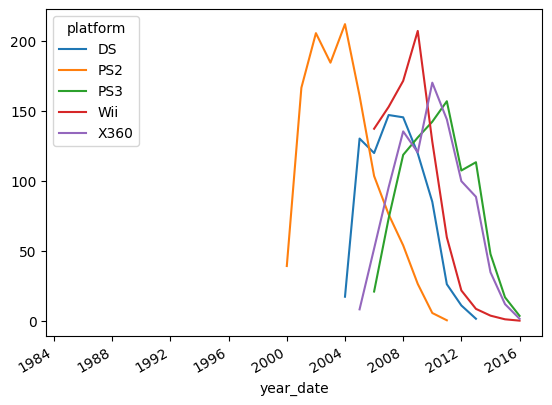

In [13]:
#plataformas por ventas totales
top_platforms = list(games.groupby("platform")["total_sales"].sum().sort_values().tail(5).index)
#graficaremos el top 5 de las plataformas con mayor ventas

(
    games[games["platform"].isin(top_platforms)]
    .pivot_table(index="year_date",
                 columns="platform",
                 values="total_sales",
                 aggfunc="sum")
    .plot(kind="line")
)

Graficamos la distribución por año de las plataformas más populares desde 1993

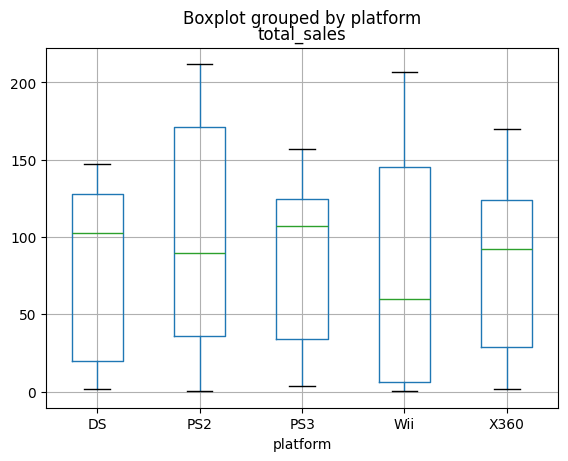

In [14]:
#Aplicamos un filtro para considerar los juegos a partir de 1993
filtered_games = games.query("year_date > '1993-01-01'")

#Agrupamos por fecha y plataforma en ventas totales
sales_by_year = filtered_games.groupby(["year_date", "platform"])["total_sales"].sum().reset_index()

#Creamos diagramas de caja
sales_by_year[sales_by_year["platform"].isin(top_platforms)][["total_sales", "platform"]].boxplot(
    column="total_sales",
    by="platform",
)
plt.show()

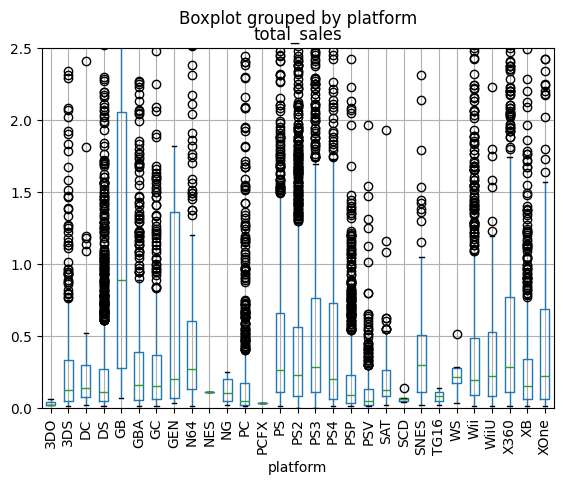

In [38]:
#Distribución de ventas totales por plataforma
filtered_games.boxplot(
    column="total_sales",
    by="platform",
    rot= 90
)
plt.ylim(0, 2.5)
plt.show()

<Axes: xlabel='platform'>

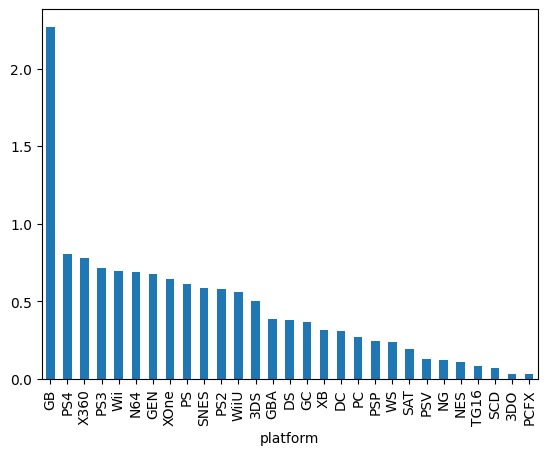

In [39]:
(
    filtered_games.groupby("platform")["total_sales"]
    .mean()
    .sort_values(ascending=False)
    .plot(kind="bar")
)

Al comparar el diagrama de promedios con los diagramas de cajas, observamos que el promedio de ventas de GB es mucho mayor que el resto, así como tambien vemos que es la plataforma con menos valores atipicos. Por otro lado, también observamos que puede que los promedios no nos digan información muy precisa estadisticamente ya que los cuadriles son muy dispersos, parece no haber un comportamiento muy uniforme en las ventas.

Para descubrir el comportamiento de la popularidad en cuanto al tiempo, sería interesante dividir el análisis por consola. Ya que cada consola suele lanzar su actualización impactando las ventas de su versión anterior. Clasificaremos las plataformas de la siguiente manera:
- XBox: XB, X360, XOne
- Play Station: PS, PS2, PS3, PS4, 
- Play portátil: PSP, PSV
- Nintendo: NES, SNES, N64, GC, Wii, WiiU
- Nintendo portátil: GB, GC, GBA, DS, 3DS

<Axes: xlabel='year_date'>

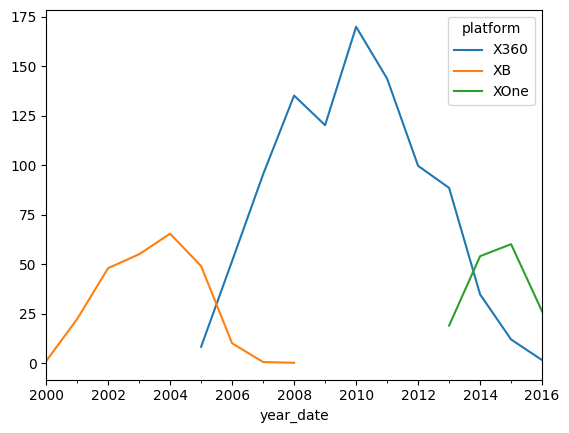

In [16]:
xbox = ["XB", "X360", "XOne"]

games[games["platform"].isin(xbox)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")


<Axes: xlabel='year_date'>

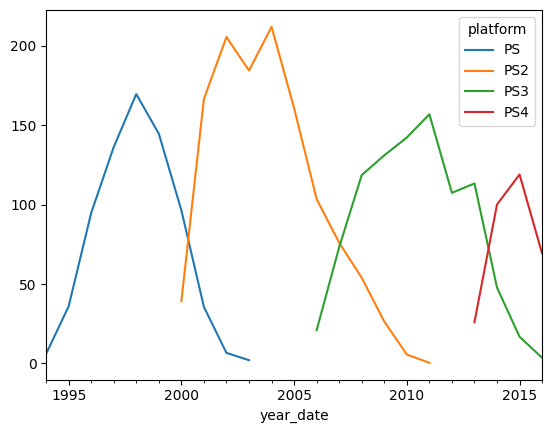

In [17]:
play_s = ["PS", "PS2", "PS3", "PS4"]

games[games["platform"].isin(play_s)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")

<Axes: xlabel='year_date'>

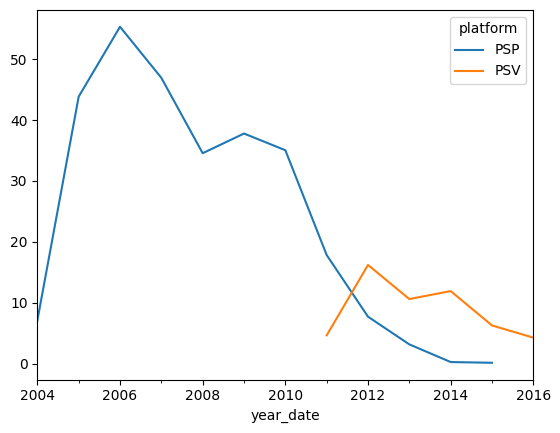

In [18]:
play_p = ["PSP", "PSV"]

games[games["platform"].isin(play_p)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")

<Axes: xlabel='year_date'>

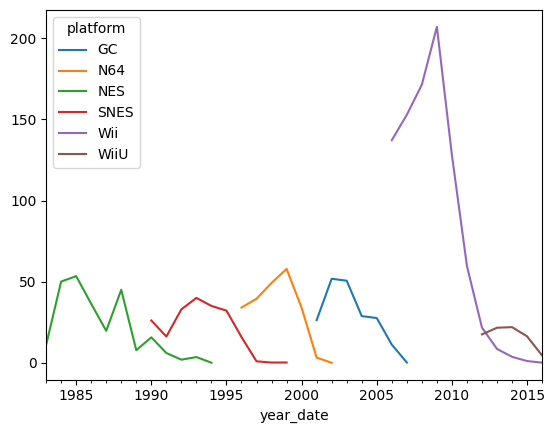

In [19]:
nintendo = ["NES", "SNES", "N64", "GC", "Wii", "WiiU"]

games[games["platform"].isin(nintendo)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")

<Axes: xlabel='year_date'>

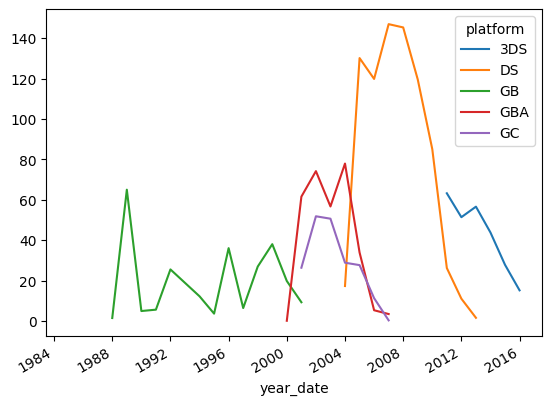

In [20]:
nintendo_p = ["GB", "GC", "GBA", "DS", "3DS"]
              
games[games["platform"].isin(nintendo_p)].pivot_table(index="year_date",
                                                              columns="platform",
                                                              values="total_sales",
                                                              aggfunc="sum").plot(kind="line")

Se observa claramente que en el caso de cada consola la popularidad llega a su punto máximo al año o par de años siguientes al lanzamiento y posteriormente decae al toparse con el lanzamiento de una nueva plataforma o versión, podemos deducir que las plataformas generan ventas en un periodo de aproximadamente 10 años.

*Periodo de interés. Dado que nos interesa el análisis para predicciones del año 2017, lo más representativo sería analizar unicamente las plataformas que han tenido ventas en los ultimos 5 años, adicionalmente analizaremos aquellas plataformas que han tenido ventas en el 2016.

In [21]:
#Filtramos los la tabla con datos del 2016
games_5 = games[games["year_of_release"] >= 2011]
print(games_5.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 4022 entries, 16 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             4022 non-null   object        
 1   platform         4022 non-null   object        
 2   year_of_release  4022 non-null   float64       
 3   genre            4022 non-null   object        
 4   na_sales         4022 non-null   float64       
 5   eu_sales         4022 non-null   float64       
 6   jp_sales         4022 non-null   float64       
 7   other_sales      4022 non-null   float64       
 8   critic_score     1812 non-null   float64       
 9   user_score       2381 non-null   object        
 10  rating           2314 non-null   object        
 11  year_date        4022 non-null   datetime64[ns]
 12  user_score_new   2381 non-null   float64       
 13  total_sales      4022 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(5)

<Axes: xlabel='year_date'>

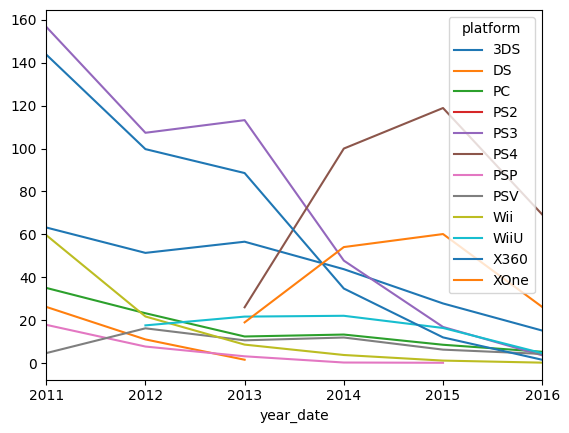

In [22]:
games_5.pivot_table(index="year_date", columns="platform", values="total_sales", aggfunc="sum").plot(kind="line")

<Axes: xlabel='year_date'>

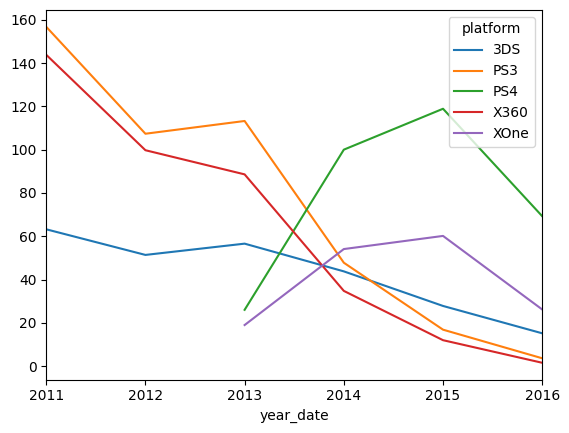

In [23]:
top_last_5 = list(games_5.groupby("platform")["total_sales"].sum().sort_values().tail(5).index)
#graficaremos el top 5 de las plataformas con mayor ventas

(
    games_5[games_5["platform"].isin(top_last_5)]
    .pivot_table(index="year_date",
                 columns="platform",
                 values="total_sales",
                 aggfunc="sum")
    .plot(kind="line")
)

Las plataformas líderes en la actualidad son 3DS, PS3, PS4, X360 y XOne. Sin embargo, es razonable descartar X360 y PS3 ya que las compañias cuentan con plataformas más recientes (XOne y PS4) las cuales según la tendencia terminarán por desplazarlas. Además, podremos incluir PC como rentable ya que se sigue mantenido con ventas por 26 años consecutivos, WiiU podríamos considerarla igual ya que su predecesora Wii se mantuvo en ventas por 11 años consecutivos y WiiU fue lanzado en 2012 por lo que esperariamos que aun tenga ventas unos años más. De manera que consideraremos como rentables las siguientes:
-3DS
-PS4
-XOne
-PC
-WiiU


In [24]:
#filtrado de plataformas de interés
plataformas = ["3DS", "PS4", "XOne", "PC", "WiiU"]

interes = games[games["platform"].isin(plataformas)]

<Axes: xlabel='platform'>

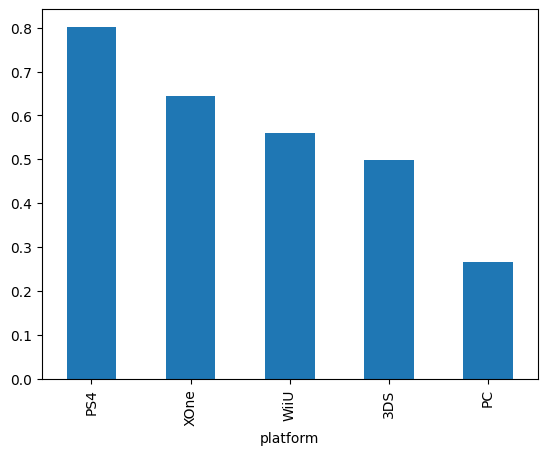

In [36]:
(
    interes.groupby("platform")["total_sales"].mean().sort_values(ascending=False).plot(kind="bar")
)

En nuestras plataformas de interés, la mas rentable parece ser la PS4 y el XOne. Sin embargo, considerar las 5 plataformas parecen ser buena opción.

*Impacto de las reseñas en las ventas

*Distribución de los juegos por género